<a href="https://colab.research.google.com/github/Zeeshan-Ahmad-Yar/Classification-using-LogisticRegression/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [73]:
df = pd.read_csv('/content/drive/MyDrive/Data PreProcessing/titanacdata.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# **Heatmap for missing values**

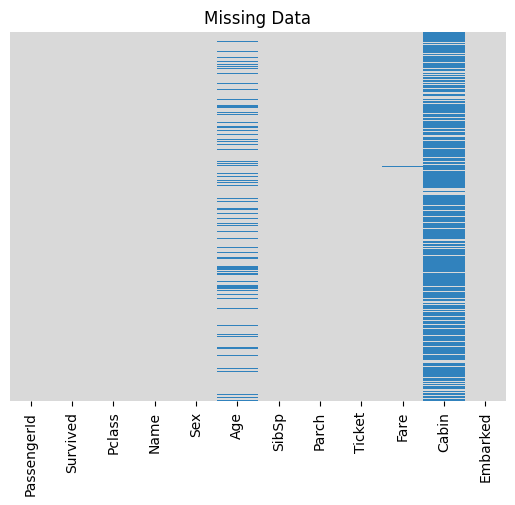

In [75]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing Data')
plt.show()

# **Detect and remove outliers before filling missing values**

<Axes: ylabel='Age'>

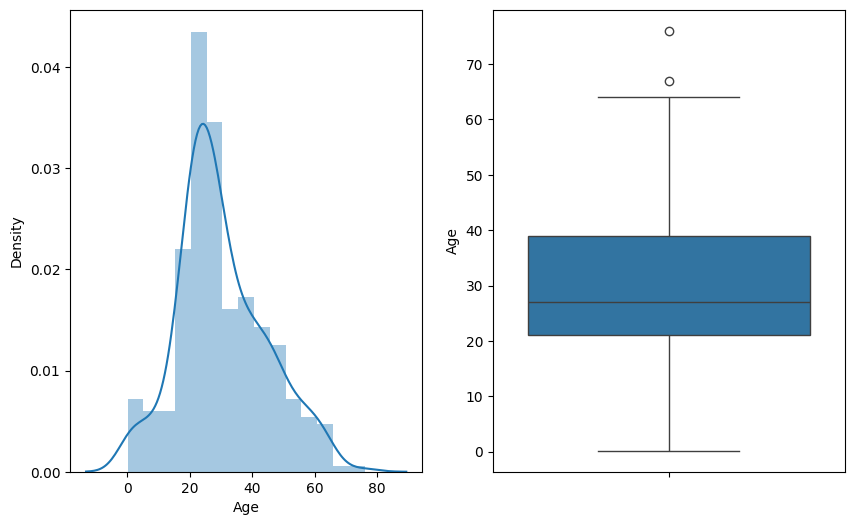

In [76]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['Age'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Age'])

In [77]:
# find upper and lower limit
upper_limit = df['Age'].quantile(0.99)
lower_limit = df['Age'].quantile(0.01)

In [78]:
# caping data
df['Age'] = np.where(
    df['Age'] >= upper_limit,
                 upper_limit,
                 np.where(df['Age'] <= lower_limit,
                                       lower_limit,
                                       df['Age']
                          )
  )

# **Now we fill mising values**

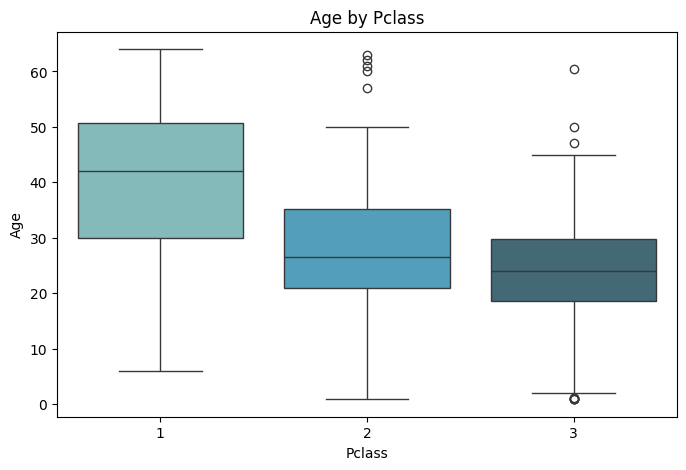

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=df, palette='GnBu_d').set_title('Age by Pclass')
plt.show()

In [80]:
class1_mean = df[df['Pclass'] == 1]['Age'].mean()
class2_mean = df[df['Pclass'] == 2]['Age'].mean()
class3_mean = df[df['Pclass'] == 3]['Age'].mean()

In [81]:
def impute_age(col):
  Age = col[0]
  Pclass = col[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return class1_mean
    elif Pclass == 2:
      return class2_mean
    else:
       return class2_mean

  else:
     return Age

In [82]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

# **Remove cabin feature**

In [83]:
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [84]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


# **Encode Categorical feature**

In [85]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
5,0,3,14.0,0,0,9.2250,1,0,1
6,1,3,30.0,0,0,7.6292,0,1,0
7,0,2,26.0,1,1,29.0000,1,0,1
8,1,3,18.0,0,0,7.2292,0,0,0
9,0,3,21.0,2,0,24.1500,1,0,1


# **Divide dataset into input and target variable**

In [86]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **create instance**

In [88]:
Lreg = LogisticRegression()
Lreg.fit(X_train, y_train)

LogisticRegression()

# **Predict Output**

In [89]:
y_pred_Lreg = Lreg.predict(X_test)
y_pred_Lreg.shape

(84,)

In [93]:
# Now we check probabilities
probability = Lreg.predict_proba(X_test)[:, 1]
probability.shape
print(probability)

[0.93723379 0.02375796 0.92577224 0.03454155 0.94783856 0.02293615
 0.03477046 0.02389495 0.02498751 0.0512869  0.95296213 0.02521847
 0.03191847 0.02477255 0.03336564 0.02684994 0.0282149  0.94228781
 0.95427959 0.92541963 0.03593447 0.02326782 0.02727432 0.03398395
 0.9442623  0.93245448 0.02752973 0.94874147 0.02782126 0.02293615
 0.02423996 0.93888923 0.02219013 0.03026483 0.94452887 0.02625037
 0.03402001 0.0290167  0.9437975  0.95328677 0.02781809 0.02293615
 0.02462447 0.97485364 0.94809569 0.02375883 0.94924468 0.03142374
 0.93046686 0.03199784 0.02556892 0.03198206 0.94050101 0.02734354
 0.94783856 0.95102728 0.96072137 0.02195633 0.02657313 0.03307367
 0.02313684 0.03237204 0.95351211 0.02541355 0.02149719 0.95613044
 0.02601067 0.93545149 0.94031551 0.95084876 0.97706469 0.93722908
 0.03132316 0.02638744 0.93173511 0.02777542 0.94005606 0.0233805
 0.03237204 0.97407391 0.02796746 0.94942627 0.9281086  0.03033342]


# ***Probability with class***

In [91]:
for i in range(len(y_test)):
  print(np.round(probability[i], 3), '--->', y_pred_Lreg[i])

0.937 ---> 1
0.024 ---> 0
0.926 ---> 1
0.035 ---> 0
0.948 ---> 1
0.023 ---> 0
0.035 ---> 0
0.024 ---> 0
0.025 ---> 0
0.051 ---> 0
0.953 ---> 1
0.025 ---> 0
0.032 ---> 0
0.025 ---> 0
0.033 ---> 0
0.027 ---> 0
0.028 ---> 0
0.942 ---> 1
0.954 ---> 1
0.925 ---> 1
0.036 ---> 0
0.023 ---> 0
0.027 ---> 0
0.034 ---> 0
0.944 ---> 1
0.932 ---> 1
0.028 ---> 0
0.949 ---> 1
0.028 ---> 0
0.023 ---> 0
0.024 ---> 0
0.939 ---> 1
0.022 ---> 0
0.03 ---> 0
0.945 ---> 1
0.026 ---> 0
0.034 ---> 0
0.029 ---> 0
0.944 ---> 1
0.953 ---> 1
0.028 ---> 0
0.023 ---> 0
0.025 ---> 0
0.975 ---> 1
0.948 ---> 1
0.024 ---> 0
0.949 ---> 1
0.031 ---> 0
0.93 ---> 1
0.032 ---> 0
0.026 ---> 0
0.032 ---> 0
0.941 ---> 1
0.027 ---> 0
0.948 ---> 1
0.951 ---> 1
0.961 ---> 1
0.022 ---> 0
0.027 ---> 0
0.033 ---> 0
0.023 ---> 0
0.032 ---> 0
0.954 ---> 1
0.025 ---> 0
0.021 ---> 0
0.956 ---> 1
0.026 ---> 0
0.935 ---> 1
0.94 ---> 1
0.951 ---> 1
0.977 ---> 1
0.937 ---> 1
0.031 ---> 0
0.026 ---> 0
0.932 ---> 1
0.028 ---> 0
0.94 ---> 1
0.0

# **Model Evaluation**

In [94]:
print('Classification Model')
print('-' * 30)
Lreg_accuracy = round(accuracy_score(y_test, y_pred_Lreg) * 100, 2)
print('Accuracy', Lreg_accuracy, '%')

Classification Model
------------------------------
Accuracy 100.0 %
